In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import colombia_weather
import prepare
import explore

In [178]:
import seaborn as sns
%matplotlib inline
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

In [4]:
#matplot lib needs this to avoid datatype error with pandas
pd.plotting.register_matplotlib_converters()

In [ ]:
blob = prepare.get_data()

In [ ]:
blob.tail()

In [ ]:
df = pd.read_csv("psd_coffee.csv")

In [ ]:
df = df[df.Country_Name == "Colombia"]

In [ ]:
df.dtypes

In [ ]:
df[df.Market_Year == 2015]

In [ ]:
import colombia_weather

In [ ]:
pd.DataFrame.from_dict(colombia_weather.stations,orient="index")

In [ ]:
from colombia_weather import weather_stations

In [ ]:
colombia_weather.weather_stations

In [ ]:
colombia_weather.get_weather()

In [ ]:
df = pd.read_csv("coffee_data/coffee.csv")

In [ ]:
df.price_adjusted_inflation.plot()

In [ ]:
df

In [ ]:
df.date = df.date.apply(pd.to_datetime)

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.price_adjusted_inflation.plot()
plt.title("Price of coffee 1958-")

In [ ]:
import plotly
import pandas as pd
import plotly.graph_objects as go

In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

In [ ]:
years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002","2007"]

In [ ]:
continents = list(dataset['continent'].unique())

In [ ]:
fig_dict = {
    "data": [],
    "layout":{},
    "frames": []
    }

In [ ]:
fig_dict['layout']['xaxis'] = {"range": [30,85],'title':'Life Expactancy'}

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[1, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['Colombia', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[0, 1, -1, -1, 0,1]).finish()
plt.title("Sankey diagram with default settings")


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement = "snap",
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],
        "x": [0.5, 0.1, 0.5, 0.7, 0.3, 0.5],
        "y": [0.7, 0.5, 0.2, 0.4, 0.2, 0.3],
        'pad':10},  # 10 Pixels 
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value": [1, 2, 1, 1, 1, 1, 1, 2]}))

fig.show()

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(
    hovermode = 'x',
    title="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

In [ ]:
country_code = pd.read_json('coffee_data/country_codes.json')

In [ ]:
country_code.columns = ['country','dest']

In [ ]:
country_code

In [ ]:
coffee_export_by_country = pd.read_csv("coffee_data/coffee_export_numbers.csv")

In [ ]:
coffee_export_by_country.shape

In [ ]:
coffee_export_by_country = pd.merge(coffee_export_by_country,country_code,on="dest",how="outer")

In [ ]:
coffee_export_by_country.to_csv("coffee_data/coffee_export_by_country.csv")

In [ ]:
df = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df.shape

In [ ]:
df = colombia_weather.get_weather()

In [ ]:
df[df.PRCP >=0].shape[0]/df.shape[0]

In [ ]:
df[df.DATE > '1990-01-01'].head(5)

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df["DATE2"] = df.DATE

In [ ]:
df.dtypes

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
stations = df.NAME.unique()

In [ ]:
station_activity = pd.DataFrame(df.NAME.unique(),columns=['station_name'])

In [ ]:
station_activity.head(2)

In [ ]:
station_activity = station_activity.sort_values(by='station_name').set_index('station_name')

In [ ]:
station_activity.head()

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].min()],axis=1).rename(columns={"DATE2":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='NAME').groupby("NAME")['DATE2'].max()],axis=1).rename(columns={"DATE2":"last_date_record"})

In [ ]:
station_activity

In [ ]:
grouper = df.groupby([pd.Grouper(freq='1M'),'NAME'])

In [ ]:
grouper = grouper.mean().reset_index(level='NAME')

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])

In [ ]:
year_1960 = grouper[grouper.index < '1961-01-01']

In [ ]:
year_1960.NAME.nunique()

In [ ]:
grouper.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
def weather_stations_by_year():
    df = colombia_weather.get_weather()
    df.DATE = pd.to_datetime(df.DATE)
    df.set_index('DATE',inplace=True)
    return df.groupby([pd.Grouper(freq='Y')])['NAME'].nunique()

In [ ]:
df = weather_stations_by_year()

In [ ]:
df = prepare.get_data()

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient='index')

In [ ]:
weather_stations = weather_stations.sort_index()

In [ ]:
station_dates = pd.concat([weather_stations,station_activity],axis=1)

In [ ]:
station_dates = station_dates.dropna().rename(columns = {0: "department"})

In [ ]:
station_dates.sort_values(by='first_date_record')

In [ ]:
station_dates.to_csv('weather_data/station_dates.csv')

In [ ]:
blob = pd.read_csv('coffee_data/coffee_export_by_country.csv')

In [ ]:
df = prepare.get_data()

In [ ]:
df.head(5)

In [ ]:
weather_stations = pd.DataFrame.from_dict(colombia_weather.weather_stations,orient="index")

In [ ]:
weather_stations.reset_index(inplace=True)
df.reset_index(inplace=True)

In [ ]:
weather_stations

In [ ]:
df.shape

In [ ]:
station_dates = pd.merge(df,weather_stations,how='left',left_on='region',right_on=0)

In [ ]:
weather_stations.shape

In [ ]:
station_dates.set_index('date',inplace=True)

In [ ]:
station_dates.head(2)

In [ ]:
station_activity = pd.DataFrame(station_dates.region.unique())

In [ ]:
station_activity.dropna(inplace=True)

In [ ]:
station_activity.columns = ['region']

In [ ]:
station_activity

In [ ]:
df.reset_index(inplace=True)
df.head(2)

In [ ]:
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].min()],axis=1).rename(columns={"date":"first_date_record"})
station_activity = pd.concat([station_activity,df.sort_values(by='region').groupby("region")['date'].max()],axis=1).rename(columns={"date":"last_date_record"})

In [ ]:
station_activity = station_activity.iloc[13:].drop(columns='region')

In [ ]:
station_activity.to_csv('weather_data/station_dates.csv')

In [ ]:
df = prepare.get_weather()

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.groupby(['STATION','')

In [ ]:
df.columns.apply(lower)

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df

In [ ]:
df = prepare.get_data()

In [ ]:
df = df.sort_values(by='region').sort_index()

In [ ]:
df.tail(30)

In [ ]:
df[df.mean_temp.isna()].shape

In [ ]:
mean_temp = df[['region','mean_temp']]

In [ ]:
mean_temp.head(20)

In [ ]:
mean_temp['prior_year_mean_temp'] = mean_temp.mean_temp.diff(periods=12)

In [ ]:
mean_temp.head(30)

In [ ]:
df.index.nunique()

In [ ]:
mean_temp.reset_index(inplace=True)

In [ ]:
mean_temp['unique'] = mean_temp.date.map(str) + mean_temp.region

In [ ]:
mean_temp.dtypes

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.region.unique()

In [ ]:
#for r in df.region.unique():
df[df.region == "Narino"].quantity.plot()

In [ ]:
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])

In [ ]:
region_quantity = grouper.mean()

In [ ]:
region_quantity.columns

In [ ]:
region_quantity = region_quantity.reset_index()

In [ ]:
region_quantity.set_index('date',inplace=True)

In [ ]:
region_quantity

In [ ]:
def production_by_region(df):
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.mean()
    for c in region_quantity.columns:
        region_quantity = group.c.mean()
        region_quantity = region_quantity.reset_index()
        region_quantity.set_index('date',inplace=True)

        print("Top Coffee Producing Regions of Colombia")
        for r in region_quantity.region.unique():
            region_quantity[region_quantity.region == r].quantity.plot()
            plt.title("Thousands of 60kg bags produced by " + r)
            plt.ylabel("Thousands of 60kg bags")
            plt.xlabel("Year")
            plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def production_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_quantity = grouper.quantity.sum()
    region_quantity = region_quantity.reset_index()
    region_quantity.set_index('date',inplace=True)

    print("Top Coffee Producing Regions of Colombia")
    for r in region_quantity.region.unique():
        region_quantity[region_quantity.region == r].quantity.plot()
        plt.title("Thousands of 60kg bags produced by " + r)
        plt.ylabel("Thousands of 60kg bags")
        plt.xlabel("Year")
        plt.show()

In [ ]:
production_by_region(df)

In [ ]:
def precipitation_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
precipitation_by_region(df)

In [ ]:
def avg_temp_by_region(df):
    
    grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
    region_precip = grouper.mean_precip.sum()
    region_precip = region_precip.reset_index()
    region_precip.set_index('date',inplace=True)

    print("Average precipitation by Region of Colombia")
    for r in region_precip.region.unique():
        region_precip[region_precip.region == r].mean_precip.plot()
        plt.title("Average Precipitation in mm " + r)
        plt.ylabel("Avg Precipitation (mm)")
        plt.xlabel("Year")
        plt.show()

In [ ]:
df = prepare.get_data()

In [ ]:
explore.production_by_region(df)
#df[df.index=='1971-04-01']

In [ ]:
df.region.unique()

In [ ]:
df[pd.isna(df.region)]

In [ ]:
df = df[df.index != '1971-04-01']

In [ ]:
df.shape

In [ ]:
df = df[df.index != '1971-04-01']
grouper = df[df.index >= '01-01-1980'].groupby([pd.Grouper(freq='1Y'),'region'])
region_quantity = grouper.quantity.sum()
region_quantity = region_quantity.reset_index()

In [5]:
df = prepare.get_prepped()

In [ ]:
outliers = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].mean())

In [ ]:
max_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].max()).rename(columns={'inflated':'max_inflated'})

In [ ]:
min_inflated = pd.DataFrame(df.groupby([pd.Grouper(freq='1Y')])['inflated'].min()).rename(columns={'inflated':'min_inflated'})

In [ ]:
outliers = pd.merge(outliers,max_inflated,left_index=True,right_index=True)

In [ ]:
outliers = pd.merge(outliers,min_inflated,left_index=True,right_index=True)

In [6]:
blob = explore.price_outliers(df)

In [9]:
blob91 = blob['1991':]

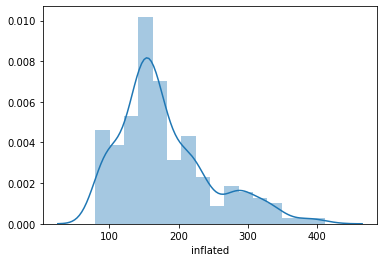

In [41]:
sns.distplot(df.inflated["1991":])

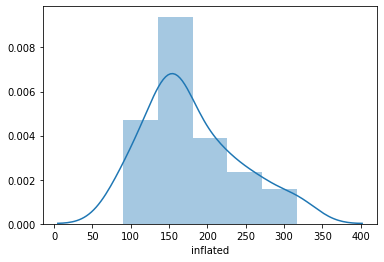

In [13]:
sns.distplot(blob91.inflated)

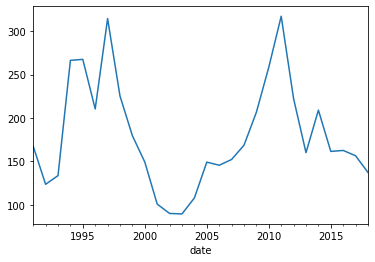

In [14]:
blob91.inflated.plot()

In [15]:
blob91.inflated.mean()

179.71947904604718

In [16]:
blob91.sort_values(by='inflated').head()

,inflated,max_inflated,min_inflated
date,,,
2003-12-31,89.331588,92.327313,84.263230
2002-12-31,89.873723,97.737247,79.446600
2001-12-31,100.677932,115.358924,88.475871
2004-12-31,107.780178,139.436232,94.811664
1992-12-31,123.502703,147.138321,101.301897


In [20]:
blob = df['1991':]

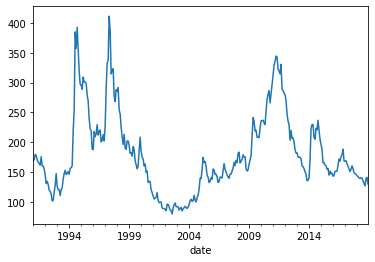

In [22]:
blob.inflated.plot()

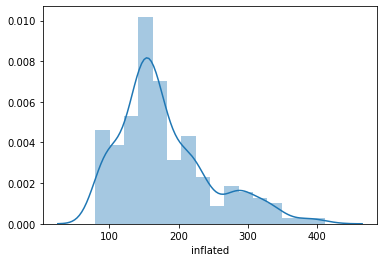

In [23]:
sns.distplot(blob.inflated)

In [32]:
df.inflated.std()

161.81297306181773

In [34]:
blob['std'] = blob.inflated.std()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
blob['mean'] = blob.inflated.mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
blob['dist_from_mean'] = blob['inflated'] - blob['mean']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
blob = blob[['quantity','inflated','std','mean','dist_from_mean']]

In [51]:
blob

,quantity,inflated,std,mean,dist_from_mean
date,,,,,
1991-01-01,1212.0,168.750541,66.872015,179.719479,-10.968938
1991-02-01,777.0,170.483585,66.872015,179.719479,-9.235894
1991-03-01,494.0,179.406918,66.872015,179.719479,-0.312561
1991-04-01,1637.0,177.471071,66.872015,179.719479,-2.248408
1991-05-01,1704.0,170.243909,66.872015,179.719479,-9.475570
...,...,...,...,...,...
2018-08-01,1258.0,130.993226,66.872015,179.719479,-48.726253
2018-09-01,1050.0,126.525333,66.872015,179.719479,-53.194146
2018-10-01,1086.0,138.804516,66.872015,179.719479,-40.914963


In [70]:
spike_years = ['1994-09-01','1997-05-01','2002-08-01','2011-04-01','2011-09-01','1995-03-01','2011-09-01']
blob[blob.dist_from_mean.abs() > (blob['std'] *1.5)]

,quantity,inflated,std,mean,dist_from_mean
date,,,,,
1994-07-01,782.0,385.081565,66.872015,179.719479,205.362086
1994-08-01,529.0,357.361521,66.872015,179.719479,177.642042
1994-09-01,681.0,392.892653,66.872015,179.719479,213.173174
1994-10-01,1530.0,354.531907,66.872015,179.719479,174.812428
1994-11-01,1764.0,319.102438,66.872015,179.719479,139.382959
1994-12-01,1404.0,297.160227,66.872015,179.719479,117.440748
1995-01-01,832.0,295.726275,66.872015,179.719479,116.006796
1995-02-01,924.0,288.723619,66.872015,179.719479,109.004140
1995-03-01,456.0,309.220805,66.872015,179.719479,129.501326


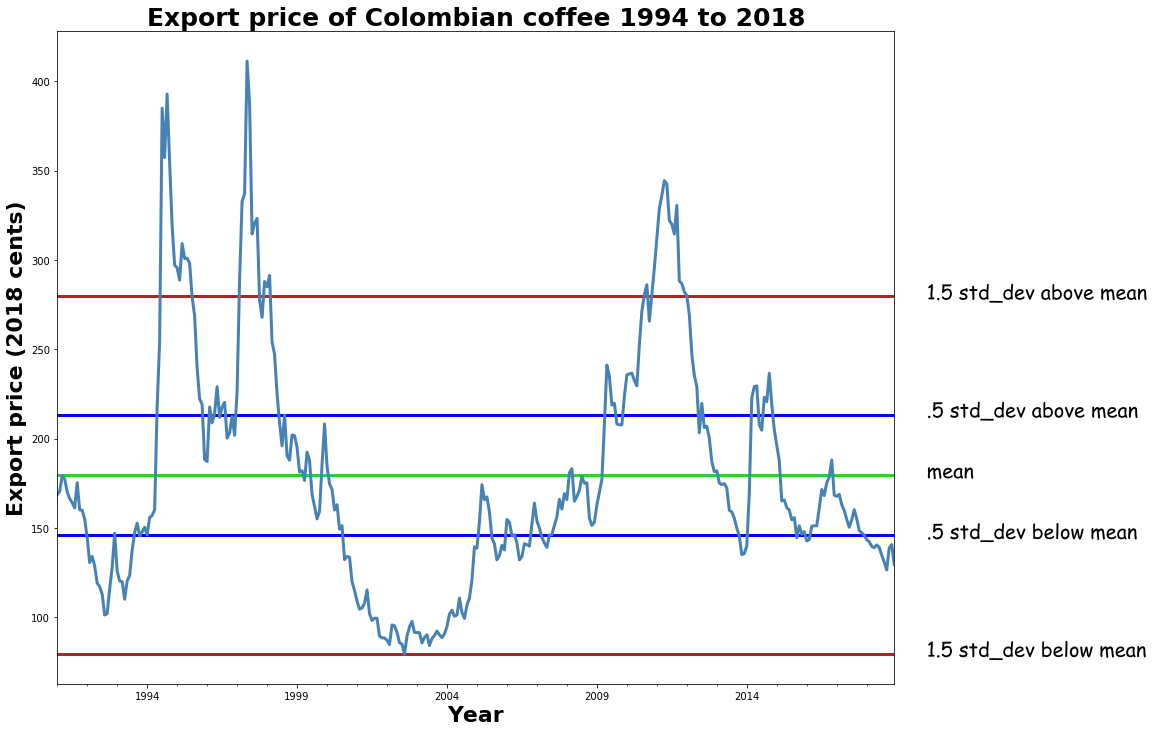

In [180]:
inflated_mean = blob.inflated.mean()
plt.figure(figsize=(15,12))
blob.inflated.plot(linewidth=3,color='steelblue')

plt.hlines(blob['inflated'].mean(),0,4000,color='limegreen',linewidth=3)
plt.hlines(blob['mean'] + (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
plt.hlines(blob['mean'] - (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
plt.hlines(blob['mean'] + (blob['std'] * .5),0,4000,color='b',linewidth=3)
plt.hlines(blob['mean'] - (blob['std'] * .5),0,4000,color='b',linewidth=3)
plt.ylabel("Export price (2018 cents)",size=22,weight='bold')
plt.xlabel("Year",size=22,weight='bold')
plt.title("Export price of Colombian coffee 1994 to 2018",size=25,weight='bold')
std_dev_above = "1.5 std_dev above mean"
std_dev_below = "1.5 std_dev below mean"
std_dev_below_half = ".5 std_dev below mean"
std_dev_above_half = ".5 std_dev above mean"

plt.xkcd()

pl.text(600,278,std_dev_above,size=20)
pl.text(600,78,std_dev_below,size=20)
pl.text(600,178,"mean",size=20)
pl.text(600,144,std_dev_below_half,size=20)
pl.text(600,212,std_dev_above_half,size=20)
plt.show()

<BarContainer object of 3 artists>

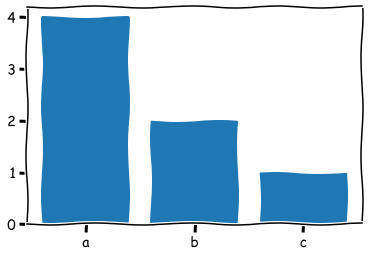

In [181]:
plt.xkcd()

plt.bar(['a', 'b', 'c'], [4, 2, 1])

In [99]:
blob[blob.inflated == blob.inflated.min()]

,quantity,inflated,std,mean,dist_from_mean
date,,,,,
2002-08-01,751.0,79.4466,66.872015,179.719479,-100.272879


In [176]:
def export_price_1991_2018(df):

    blob = df['1991':]
    blob['std'] = blob.inflated.std()
    blob['mean'] = blob.inflated.mean()
    blob['dist_from_mean'] = blob['inflated'] - blob['mean']
    blob = blob[['quantity','inflated','std','mean','dist_from_mean']]

    inflated_mean = blob.inflated.mean()
    plt.figure(figsize=(15,12))
    blob.inflated.plot(linewidth=3,color='steelblue')

    plt.hlines(blob['inflated'].mean(),0,4000,color='limegreen',linewidth=3)
    plt.hlines(blob['mean'] + (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
    plt.hlines(blob['mean'] - (blob['std'] * 1.5),0,4000,color='firebrick',linewidth=3)
    plt.hlines(blob['mean'] + (blob['std'] * .5),0,4000,color='b',linewidth=3)
    plt.hlines(blob['mean'] - (blob['std'] * .5),0,4000,color='b',linewidth=3)
    plt.ylabel("Export price (2018 cents)",size=22,weight='bold')
    plt.xlabel("Year",size=22,weight='bold')
    plt.title("Export price of Colombian coffee 1994 to 2018",size=25,weight='bold')
    std_dev_above = "1.5 std_dev above mean"
    std_dev_below = "1.5 std_dev below mean"
    std_dev_below_half = ".5 std_dev below mean"
    std_dev_above_half = ".5 std_dev above mean"

    pl.text(600,278,std_dev_above,size=20)
    pl.text(600,78,std_dev_below,size=20)
    pl.text(600,178,"mean",size=20)
    pl.text(600,144,std_dev_below_half,size=20)
    pl.text(600,212,std_dev_above_half,size=20)
    plt.show()

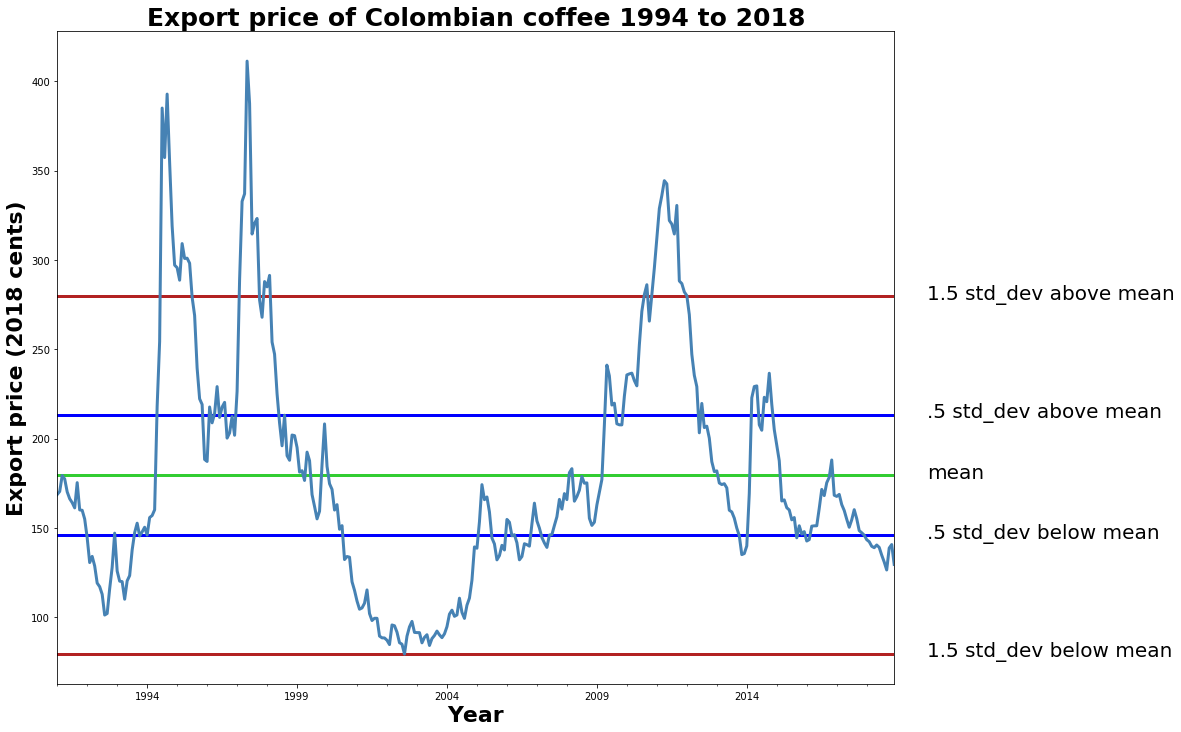

In [179]:
export_price_1991_2018(df)

In [182]:
spike_years = ['1994-09-01','1997-05-01','2002-08-01','2011-04-01','2011-09-01','1995-03-01','2011-09-01']

In [186]:
spike_years = pd.DataFrame(spike_years)

In [191]:
spike_years = pd.to_datetime(spike_years[0])

In [193]:
spike_years.sort_values(inplace=True)

In [195]:
spike_years.columns = ['spike_year']

In [199]:
spike_years

0   1994-09-01
5   1995-03-01
1   1997-05-01
2   2002-08-01
3   2011-04-01
4   2011-09-01
6   2011-09-01
Name: 0, dtype: datetime64[ns]

In [206]:
blob['1994':].head(20)
blob['half_std_dev'] = blob['mean'] + (blob['std'] * .5)
blob['1994':].head(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev
date,,,,,,
1994-01-01,829.0,146.089376,66.872015,179.719479,-33.630103,213.155486
1994-02-01,945.0,155.882888,66.872015,179.719479,-23.836591,213.155486
1994-03-01,840.0,157.001178,66.872015,179.719479,-22.718301,213.155486
1994-04-01,967.0,160.220499,66.872015,179.719479,-19.498980,213.155486
1994-05-01,819.0,218.083549,66.872015,179.719479,38.364070,213.155486
1994-06-01,941.0,254.427983,66.872015,179.719479,74.708504,213.155486
1994-07-01,782.0,385.081565,66.872015,179.719479,205.362086,213.155486
1994-08-01,529.0,357.361521,66.872015,179.719479,177.642042,213.155486
1994-09-01,681.0,392.892653,66.872015,179.719479,213.173174,213.155486


In [ ]:
drop_to_mean_date = ['1995-12-01',]

In [209]:
blob['spike_year'] = blob['mean'] + (blob['std']*2) < blob['inflated']

In [235]:
blob[blob['spike_year'] == True]
blob['within_norm'] = (blob['inflated'] < (blob['mean'] + (blob['std']*.5))) & (blob['inflated'] > (blob['mean'] - (blob['std']*.5))) 


In [236]:
print(179.71-(66.87 *.5))
print(179.71+(66.87 *.5))

146.275
213.145


In [242]:
blob[(blob.inflated >144) & (blob.inflated < 215)].sort_values(by='inflated').tail(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
2013-01-01,877.0,181.983777,66.872015,179.719479,2.264298,213.155486,False,True
1999-03-01,670.0,182.075184,66.872015,179.719479,2.355705,213.155486,False,True
2008-03-01,872.0,183.222448,66.872015,179.719479,3.502969,213.155486,False,True
2000-01-01,658.0,184.553437,66.872015,179.719479,4.833958,213.155486,False,True
1999-11-01,882.0,185.556919,66.872015,179.719479,5.837440,213.155486,False,True
2012-11-01,770.0,187.132466,66.872015,179.719479,7.412987,213.155486,False,True
1996-01-01,2081.0,187.265966,66.872015,179.719479,7.546487,213.155486,False,True
2015-02-01,1029.0,187.612588,66.872015,179.719479,7.893109,213.155486,False,True
1999-06-01,740.0,187.727352,66.872015,179.719479,8.007873,213.155486,False,True


In [244]:
blob[blob.spike_year == True]

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
1994-07-01,782.0,385.081565,66.872015,179.719479,205.362086,213.155486,True,False
1994-08-01,529.0,357.361521,66.872015,179.719479,177.642042,213.155486,True,False
1994-09-01,681.0,392.892653,66.872015,179.719479,213.173174,213.155486,True,False
1994-10-01,1530.0,354.531907,66.872015,179.719479,174.812428,213.155486,True,False
1994-11-01,1764.0,319.102438,66.872015,179.719479,139.382959,213.155486,True,False
1997-03-01,500.0,332.853671,66.872015,179.719479,153.134192,213.155486,True,False
1997-04-01,824.0,337.077901,66.872015,179.719479,157.358422,213.155486,True,False
1997-05-01,836.0,411.346121,66.872015,179.719479,231.626642,213.155486,True,False
1997-06-01,1078.0,387.612207,66.872015,179.719479,207.892728,213.155486,True,False


In [256]:
spike_years = spike_years[0:6]

In [253]:
within_norm = ['1995-12-01','1995-12-01','1998-06-01','2005-02-01','2012-06-01','2012-06-01']
blob['2011':].head(40)

,quantity,inflated,std,mean,dist_from_mean,half_std_dev,spike_year,within_norm
date,,,,,,,,
2011-01-01,908.0,311.864401,66.872015,179.719479,132.144922,213.155486,False,False
2011-02-01,764.0,328.826077,66.872015,179.719479,149.106598,213.155486,True,False
2011-03-01,779.0,336.133857,66.872015,179.719479,156.414378,213.155486,True,False
2011-04-01,523.0,344.441433,66.872015,179.719479,164.721954,213.155486,True,False
2011-05-01,673.0,342.655047,66.872015,179.719479,162.935568,213.155486,True,False
2011-06-01,471.0,322.145271,66.872015,179.719479,142.425792,213.155486,True,False
2011-07-01,530.0,320.116989,66.872015,179.719479,140.397510,213.155486,True,False
2011-08-01,466.0,314.582134,66.872015,179.719479,134.862655,213.155486,True,False
2011-09-01,459.0,330.578056,66.872015,179.719479,150.858577,213.155486,True,False


In [257]:
spike_years['return_to_norm'] = 

0   1994-09-01
5   1995-03-01
1   1997-05-01
2   2002-08-01
3   2011-04-01
4   2011-09-01
Name: 0, dtype: datetime64[ns]